In [10]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(rc={'figure.figsize':(10,6)})

In [11]:
losses = torch.load('models/unpruned_model_losses.pt')
print(losses)

[118263639.2, 117908653.44, 117593415.02666667, 117291675.96, 116992390.84, 116697349.64, 116405453.09333333, 116116374.98666666, 115829487.24, 115542758.32, 115257693.18666667, 114974519.78666666, 114693103.06666666, 114413752.42666666, 114137126.74666667, 113863715.85333334, 113592854.21333334, 113322597.08, 113055303.10666667, 112793644.70666666, 112538661.06666666, 112286077.73333333, 112036282.09333333, 111788408.50666666, 111541338.44, 111296077.66666667, 111052427.28, 110810318.96, 110569684.1, 110330761.02, 110094437.8, 109863508.34666666, 109639743.25333333, 109416140.43333334, 109190323.92, 108964218.98666666, 108739273.86, 108518401.73333333, 108298177.86, 108079580.51333334, 107865390.3, 107543157.95333333, 106744887.31333333, 106299850.82, 106148163.48, 105511761.25333333, 92744631.53333333, 90972081.22666667, 94454336.93333334, 91653245.70666666, 89084259.34666666, 89878547.57333334, 90605329.10666667, 89476903.24, 88282791.32, 88390740.96, 88689092.93333334, 88135117.506

Text(0, 0.5, 'Loss (MAE)')

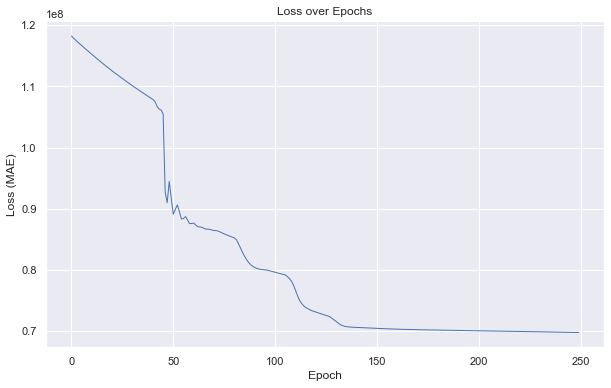

In [12]:
ax = sns.lineplot(losses, linewidth=1)
ax.set_title('Loss over Epochs')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss (MAE)')


# Model Performance Visualizations

In [13]:
# Setup Model
from model import GCN

model = GCN()
model.load_state_dict(torch.load("models/unpruned_model.pt"))
model = model.eval()

In [14]:
data = torch.load("datasets/unpruned/SG256_SM_Only_Test.pt")

y_truth = np.array([])
y_pred = np.array([])
for graph in data:
    graph.x = torch.tensor([[data[0], data[1]] for data in graph.x])
    
    for item in graph.y:
        y_truth = np.append(y_truth, item)

    out = model(graph)
    for item in out.tolist():
        y_pred = np.append(y_pred, item[0])

print(len(y_pred), len(y_truth))
print(y_pred, y_truth)


3176 3176
[7365.73876953  777.3638916  7094.94384766 ... 4183.33349609 2445.65161133
  372.73257446] [ 838.80175781  838.80175781  838.80175781 ... 1454.56335449 1454.56335449
 1124.40795898]


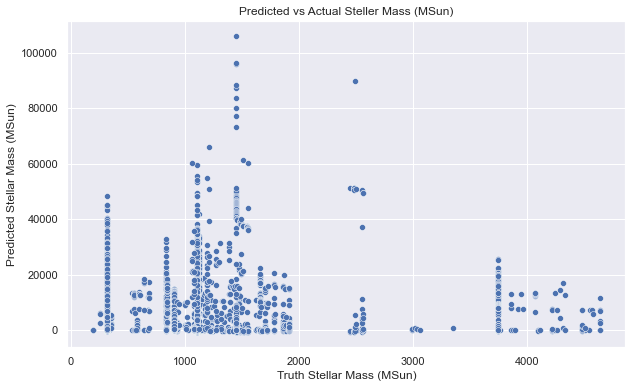

In [15]:
ax = sns.scatterplot(x=y_truth, y=y_pred)
ax.set_title('Predicted vs Actual Steller Mass (MSun)')
ax.set_xlabel('Truth Stellar Mass (MSun)')
ax.set_ylabel('Predicted Stellar Mass (MSun)')
ax.autoscale(True)

Mean absolute error: 1208.3566011893906%


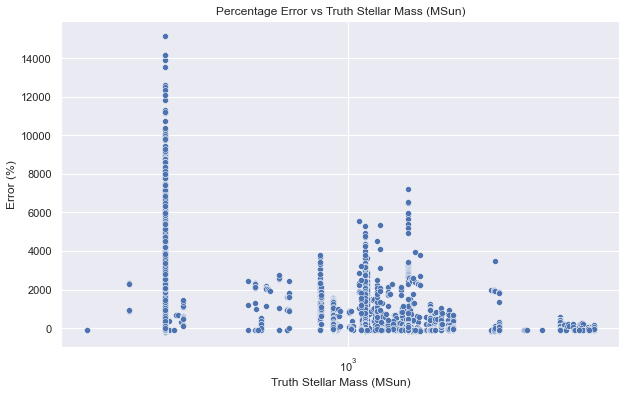

In [16]:
error = ((y_pred - y_truth) / y_truth) * 100
ax = sns.scatterplot(x=y_truth, y=error)
ax.set_xscale('log')
ax.set_title('Percentage Error vs Truth Stellar Mass (MSun)')
ax.set_ylabel('Error (%)')
ax.set_xlabel('Truth Stellar Mass (MSun)')
print(f'Mean absolute error: {np.mean(np.abs(error))}%')